In [1]:
import esm
import torch
import matplotlib.pyplot as plt


In [2]:
esm_transformer, esm2_alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = esm2_alphabet.get_batch_converter()


In [3]:
# Example

seq1 = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq = seq1 + 'GSGSGSGSGSGSGSGS'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    outputs = esm_transformer(batch_tokens, chain1_length = len(seq1), repr_layers=[33])
    
layer = outputs['representations'][33]

In [4]:
# Changing the gap size

def modify_gap (esm_model, distance):
    esm_model.gap_distance = distance
    for layer in esm_transformer.layers:
        layer.gap_distance = distance
        layer.self_attn.gap_distance = distance
        layer.self_attn.rot_emb.gap_distance = distance
    
    return esm_model


In [13]:
# Comparison of contacts. Note that the contact prediction is not retrained for working with the gap distance!!!

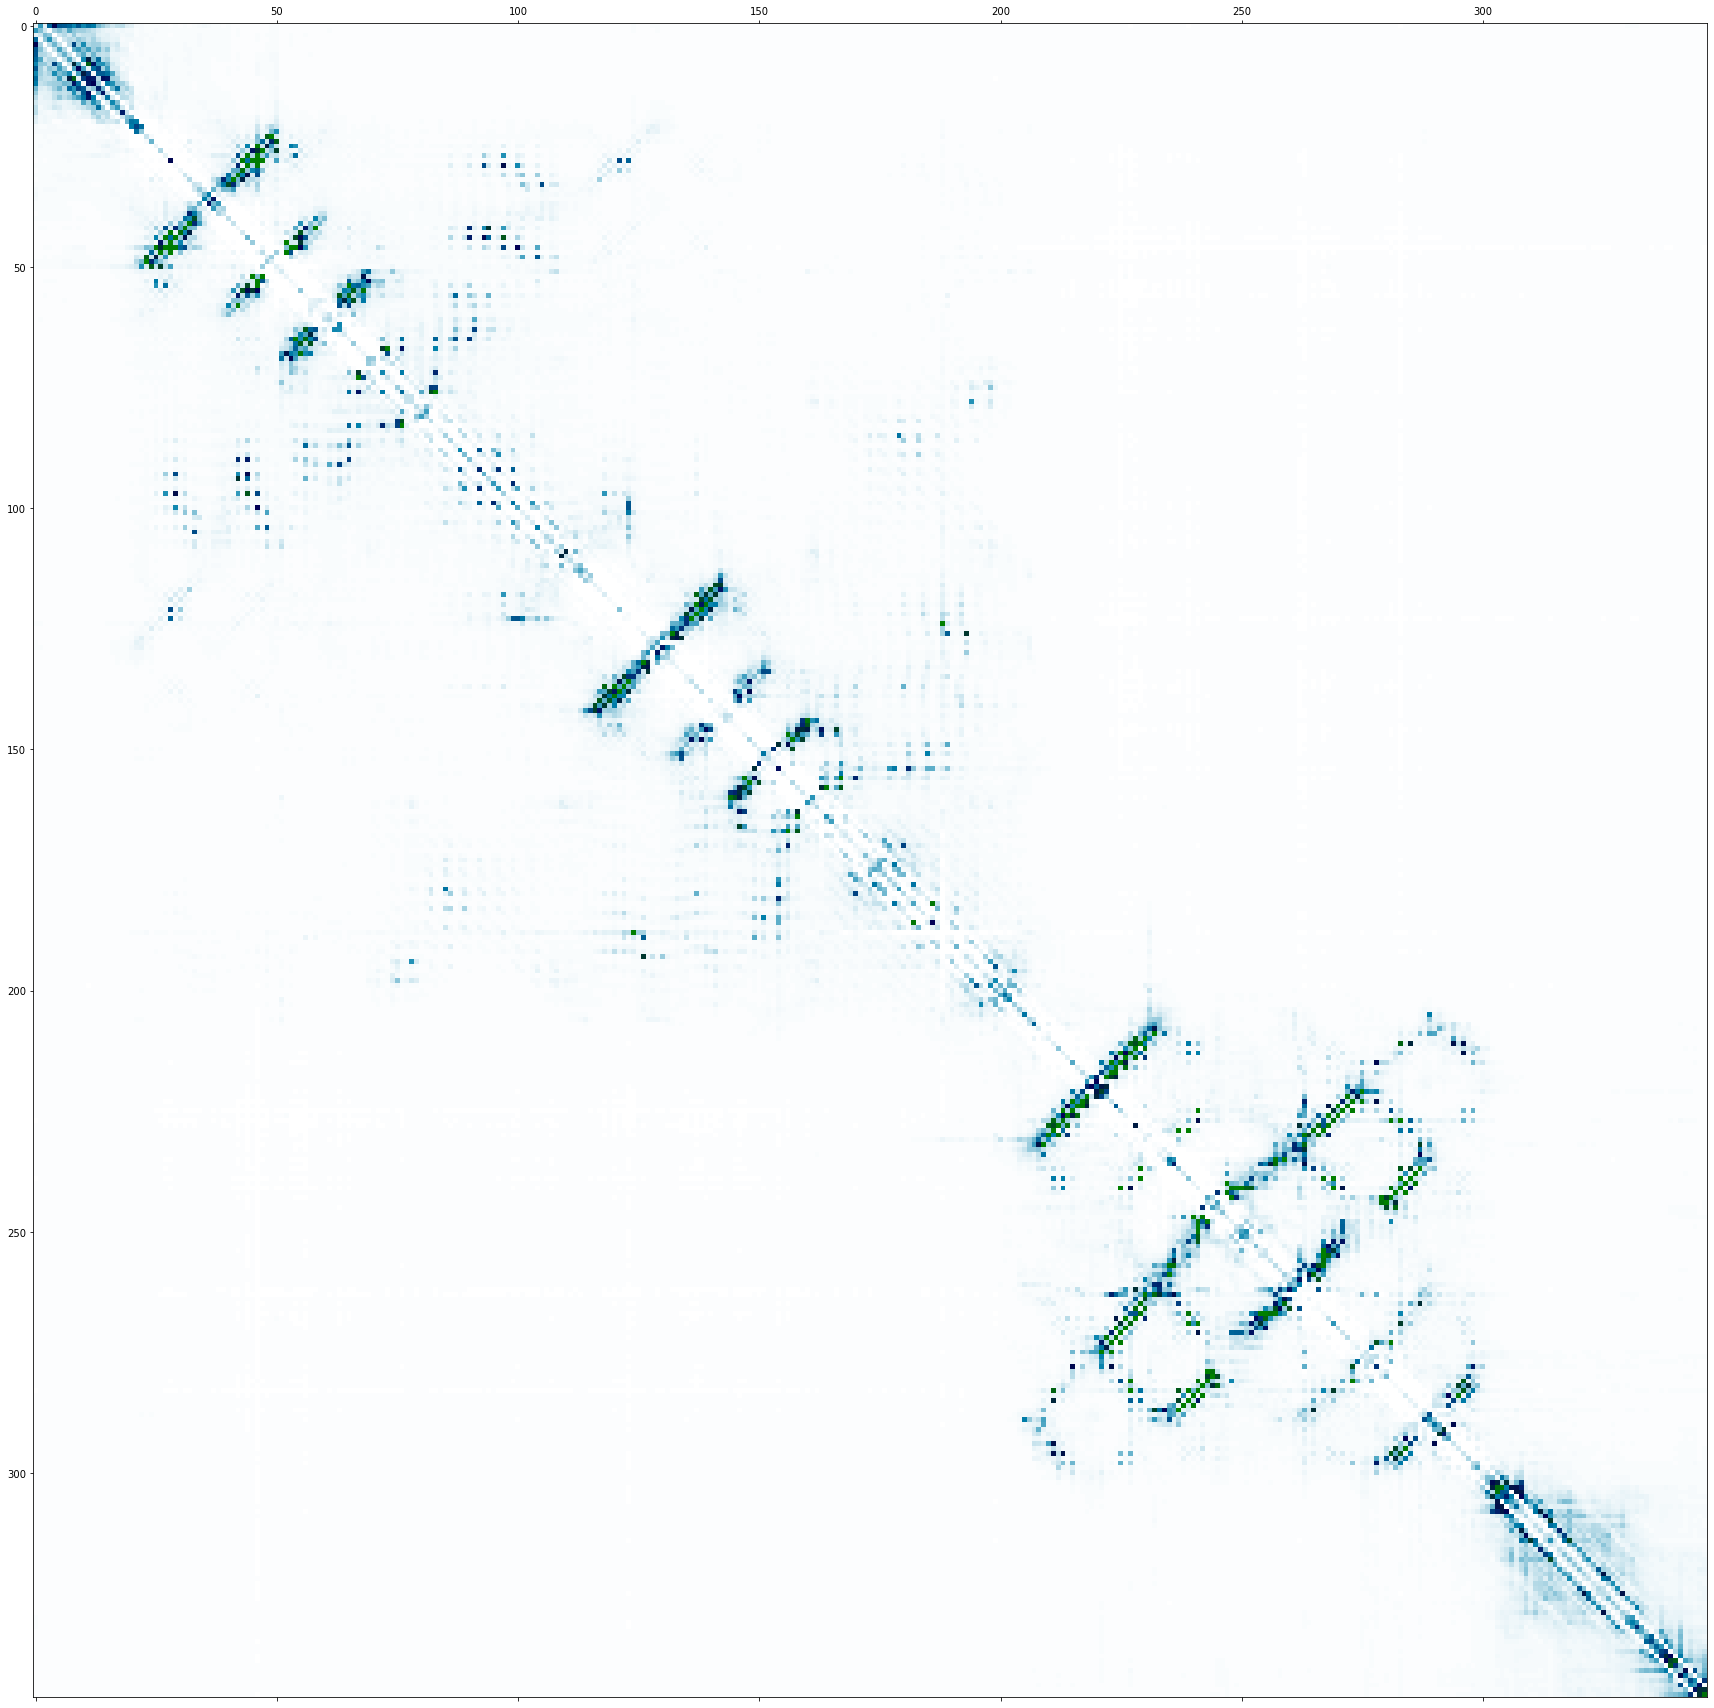

In [6]:
# One protein

seq = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'

seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    esm2_predictions = esm_transformer.predict_contacts(batch_tokens)[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions.numpy(),fignum=1,cmap='ocean_r')
plt.show()

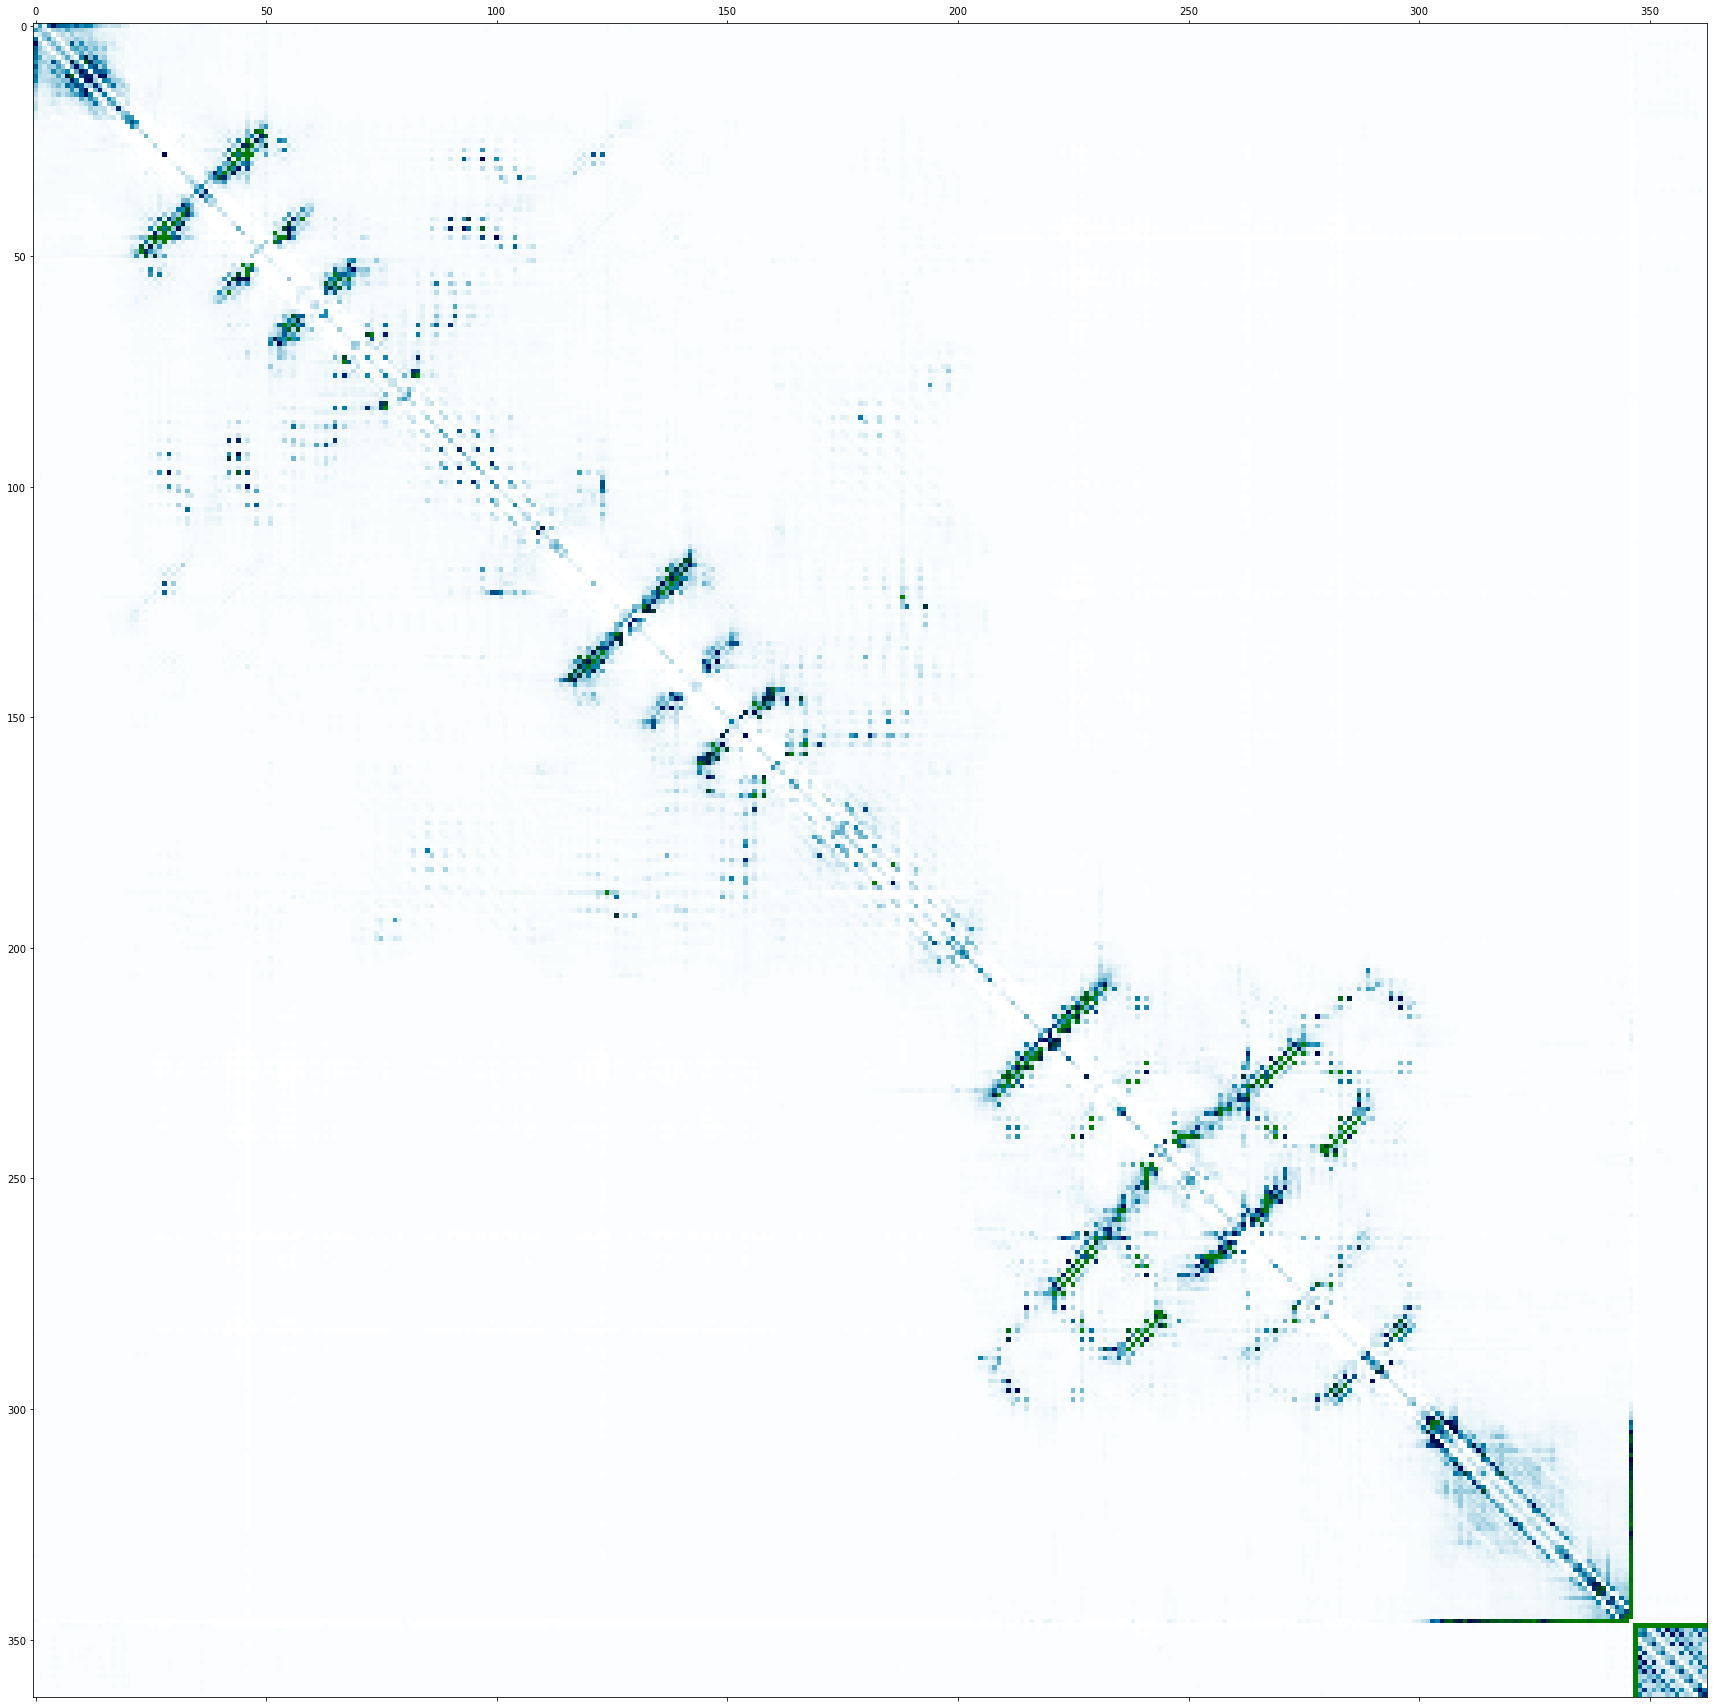

In [7]:
# Two protein

seq1 = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq = seq1 + 'GSGSGSGSGSGSGSGS'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    esm2_predictions_gap = esm_transformer.predict_contacts(batch_tokens, chain1_length = len(seq1))[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions_gap.numpy(),fignum=1,cmap='ocean_r')
plt.show()

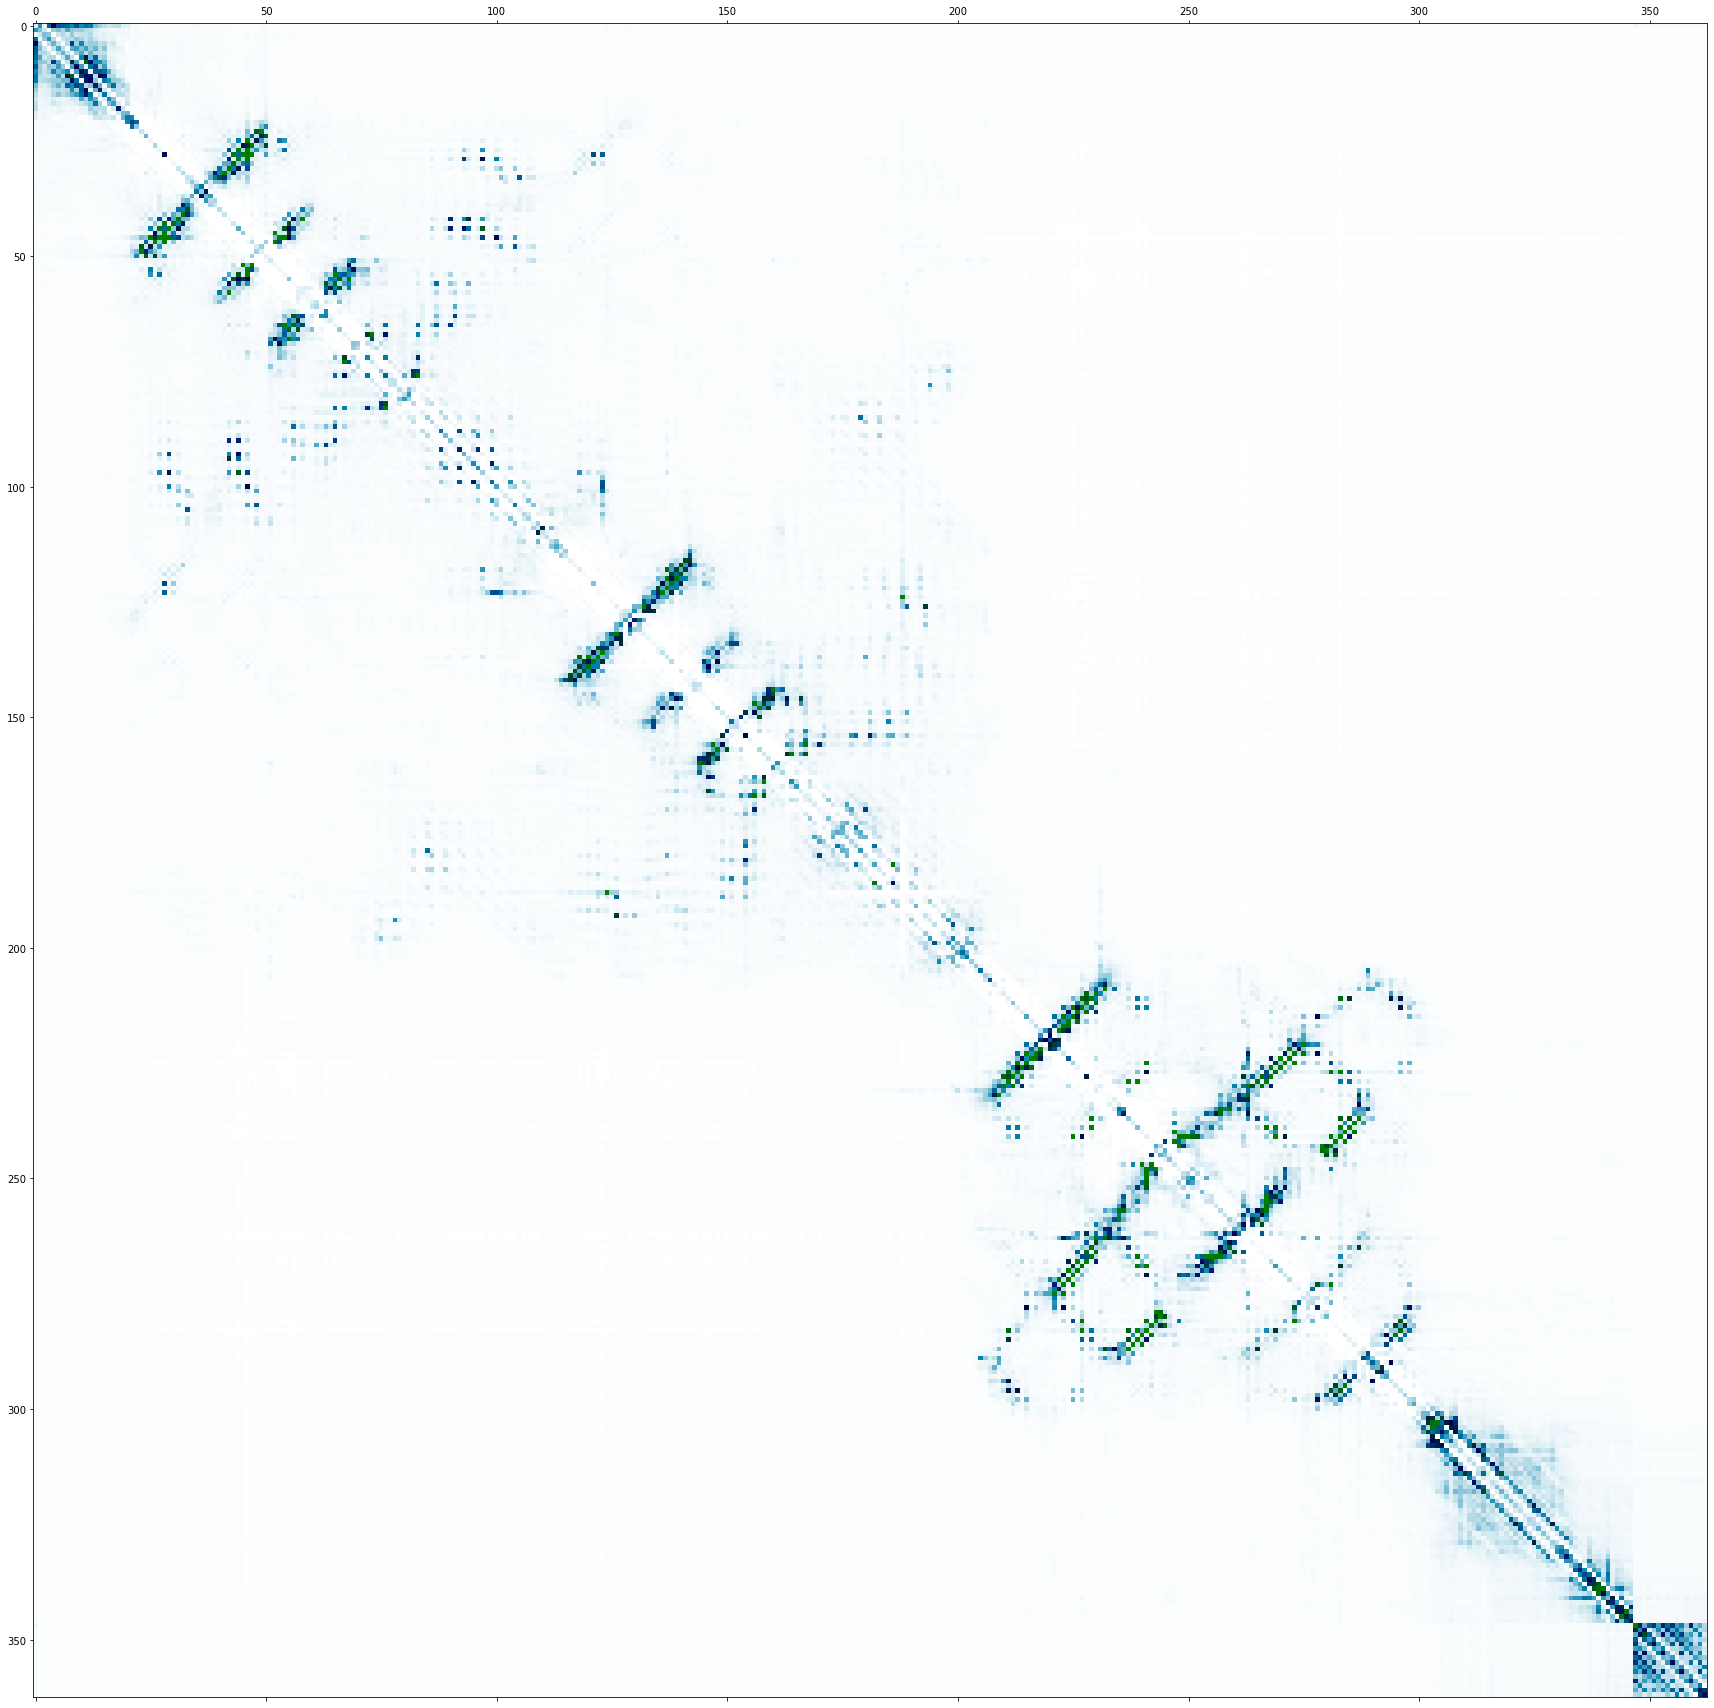

In [12]:
# Two protein, small gap
del esm_transformer 
esm_transformer, esm2_alphabet = esm.pretrained.esm2_t33_650M_UR50D()

esm_transformer = modify_gap(esm_transformer, 20)

with torch.no_grad():
    esm2_predictions_gap2 = esm_transformer.predict_contacts(batch_tokens, chain1_length = len(seq1))[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions_gap2.numpy(),fignum=1,cmap='ocean_r')
plt.show()

In [ ]:
# Compare logits and rep layer

#one protein
seq = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    outputs = esm_transformer(batch_tokens, chain1_length = len(seq1), repr_layers=[33])
    
seq1_layer = outputs['representations'][33].numpy()
seq1_logits = outputs['logits'].numpy()

#one protein + peptide with gap
seq1 = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq = seq1 + 'GSGSGSGSGSGSGSGS'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    outputs = esm_transformer(batch_tokens, chain1_length = len(seq1), repr_layers=[33])
    
gap_layer = outputs['representations'][33].numpy()
gap_logits = outputs['logits'].numpy()